<a href="https://colab.research.google.com/github/Venchislav/10-ML-Kaggle-competitions-speedrun/blob/main/Titanic_speedrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

In [162]:
df = pd.read_csv('/content/sample_data/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [164]:
df.shape

(891, 11)

In [165]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [166]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [167]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

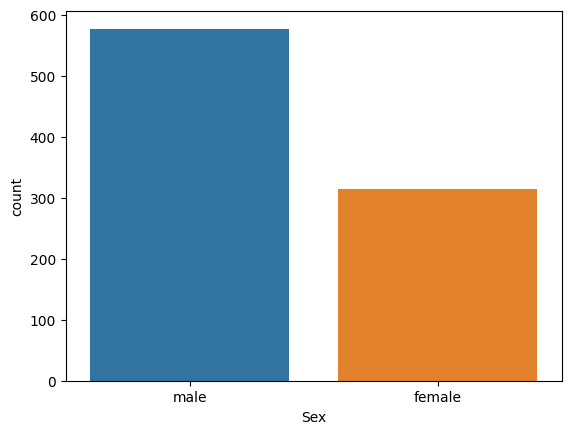

In [169]:
sns.countplot(data=df, x='Sex');

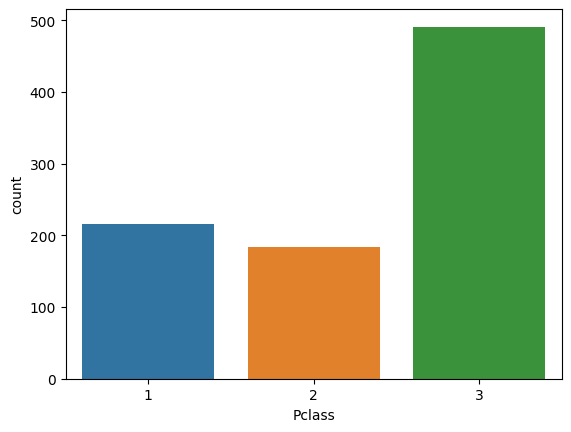

In [170]:
sns.countplot(data=df, x='Pclass');

In [171]:
df = df.drop('Cabin', axis=1)

In [172]:
age_mean = df['Age'].mean()

In [173]:
df['Age'] = df['Age'].fillna(age_mean)

In [174]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [175]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [176]:
df['Embarked'] = df['Embarked'].fillna('S')

In [177]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [178]:
df = df.drop(['Name', 'Ticket'], axis=1)

In [179]:
df = pd.get_dummies(df)

In [180]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [181]:
df.shape

(891, 11)

In [182]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [183]:
df = pd.get_dummies(df, columns=['Pclass'])

In [184]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [185]:
X = df.drop('Survived', axis=1)

In [186]:
y = df['Survived']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
clf = RandomForestClassifier()

In [190]:
RandomForestClassifier?

In [191]:
param_grid = {
    'n_estimators': range(90, 110, 5),
    'criterion': ['log_loss', 'gini', 'entropy']
}

grid = GridSearchCV(clf, param_grid, cv=3)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [192]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [193]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [194]:
accuracy_score(y_test, y_pred)

0.8395522388059702

In [195]:
recall_score(y_test, y_pred)

0.7864077669902912

In [196]:
precision_score(y_test, y_pred)

0.7941176470588235

In [197]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

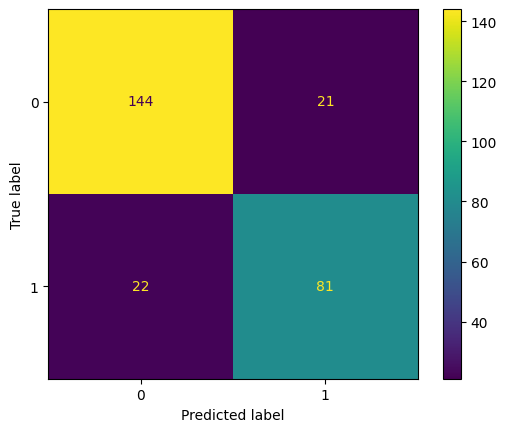

In [198]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

DONE!